<a href="https://colab.research.google.com/github/Raul-rx7/projeto_circuitos_rc/blob/main/pre_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uma abordagem de ensino de circuitos ultilizando a linguagem de programação Python

##### Obs.: Título pode sofrer mudanças ... 

#### Título alternativo:
- Uma alternativa de ensino sobre circuitos RC atráves da linguagem de programação Python.

## Resumo do trabalho
Neste presente trabalho será  abordado sobre linguagem de programaçao python e sua ultilização para a resolução de problemas sobre circuitos RC, pois hoje podemos dizer que a tecnologia se faz presente na maioria dos indíviduos da sociedade, e é usada para um bom desenvolvimento no âmbito social, como também no meu educacional. com isso, trataremos de desenvolver melhorias para os estudantes, buscando resolver problemos físicos e apurando resultados para ser examinados e discutidos. ....

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
%matplotlib inline

## Circuitos RC: uma breve revisão

In [ ]:
# Os dados:
# Os dados podem ser modificados de acordo com o problema em questão !
C = 1*(10**(-2)) # Farad
R = 10*(10**(3)) # Ohms
V = 5 # Volts
tal = R*C # Constante de tempo (ou tempo de relaxação)


# Circuito R-C
#######################################################
# Carregando um capacitor:
t = np.arange(0, 300, 1) # Tempo: 0 a 300 com passo de 1 und. (ou seja, 300 segundos)
q = (C*V)*(1 - np.exp(-t/tal)) # Carga 
i = (V*(np.exp(-t/tal)))/R # Corrente instantânea


# Descarregando um capacitor:
Q0 = q.max()  # Um ponto de partida de q, quando t=0 (obs.: descarregamento!)
q2 = Q0*(np.exp(-t/tal)) # Carga
i2 = (-Q0*(np.exp(-t/tal)))/R # Corrente instantânea

### Resultados da teoria
- Abaixo segue as simulações realizadas a partir da teoria;
- Note que os parâmetros (os dados) podem ser modificados, tais como a **capacitância**, **resistência** e **ddp**, assim como **tempo** de observação da simulação.

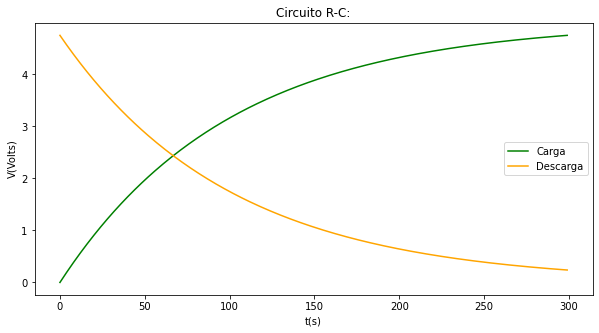

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(t, q/C, color="green", label="Carga") # Vc = q/C
plt.plot(t, q2/C, color="orange", label="Descarga")

plt.xlabel("t(s)")
plt.ylabel("V(Volts)")
plt.title("Circuito R-C:")
plt.legend(loc=0);

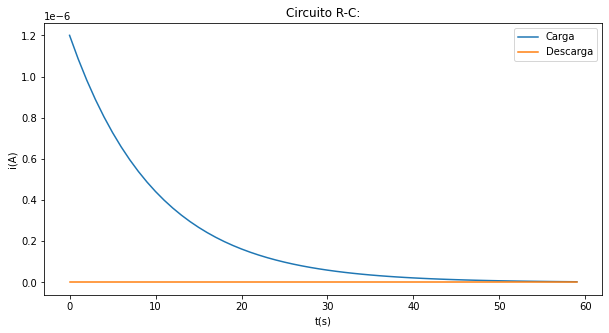

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.plot(t, i, label= "Carga")
plt.plot(t, i2, label= "Descarga")

plt.xlabel("t(s)")
plt.ylabel("i(A)")
plt.title("Circuito R-C:")
plt.legend(loc=0);

## Resultados na prática
Os seguintes resultados foram obtidos a partir da coleta de dados nas simulações no ambiente do [laboratório virtual de Física da UFC](https://www.laboratoriovirtual.fisica.ufc.br/simulacoes).

In [ ]:
# NA PRÁTICA
# PROCEDIMENTO 1:
data = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120],
                    'v': [0, 2.75, 4.35, 5.50, 6.60, 7.40, 7.80, 8.67, 9.20, 9.50, 9.72, 9.82, 9.93, 9.98]})

data2 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120], 
                     'v': [10, 7.26, 5.50, 4.20, 3.50, 2.61, 2.16, 1.33, 0.83, 0.50, 0.33, 0.18, 0.07, 0.02]})

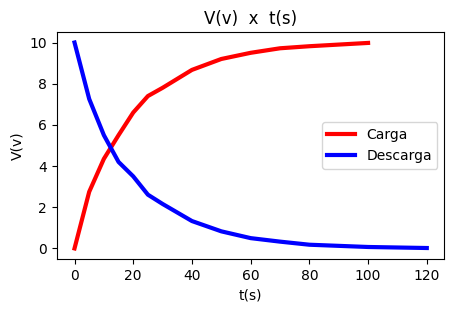

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(data['t'], data['v'], 'r-', label='Carga',lw = 3)
ax.plot(data2['t'], data2['v'], 'b-' , label='Descarga',lw = 3)
ax.set_xlabel('t(s)')
ax.set_ylabel('V(v)')
ax.set_title('V(v)  x  t(s)')
ax.legend(loc=0)
fig.savefig('v_t');

Observe que os gráficos são semelhantes, de maneira que comprova a eficácia da codificação escrita baseada na teoria.

In [ ]:
data3 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120], 
                     'v': [10, 7.10, 5.60, 4.28, 3.53, 2.63, 2.09, 1.31, 0.80, 0.49, 0.30, 0.18, 0.07, 0.02]})

In [ ]:
data4 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120], 
                     'v': [-10, -7.16, -5.74, -4.36, -3.41, -2.74, -2.11, -1.34, -0.81, -0.48, -0.30, -0.19, -0.06, -0.02]})

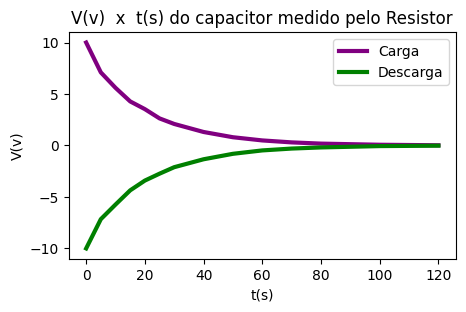

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(data3['t'], data3['v'], 'purple', label='Carga',lw = 3)
ax.plot(data4['t'], data4['v'], 'green' , label='Descarga',lw = 3)
ax.set_xlabel('t(s)')
ax.set_ylabel('V(v)')
ax.set_title('V(v)  x  t(s) do capacitor medido pelo Resistor')
ax.legend(loc=0)
fig.savefig('v_t4');

In [ ]:
data5 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120], 
                     'i': [303, 210, 160, 130, 107, 80, 60, 40, 24, 14, 9, 5.4, 2.1, 6]})

In [ ]:
data6 = pd.DataFrame({'t': [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100, 120], 
                     'i': [-303, -217, -173, -132, -103, -83, -64, -40.6, -24.5, -14.5, -9.1, -5.75, -1.81, -6]})

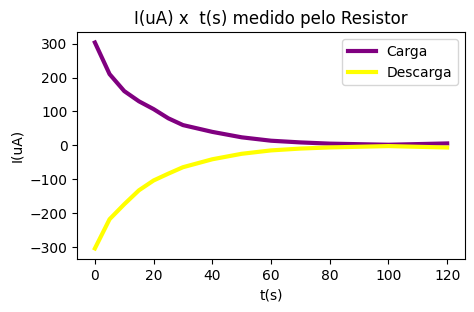

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(data5['t'], data5['i'], 'purple', label='Carga',lw = 3)
ax.plot(data6['t'], data6['i'], 'yellow' , label='Descarga',lw = 3)
ax.set_xlabel('t(s)')
ax.set_ylabel('I(uA)')
ax.set_title('I(uA) x  t(s) medido pelo Resistor')
ax.legend(loc=0)
fig.savefig('v_t5');